In [68]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #maybe use
import s3fs

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#this is not in project folder

In [69]:
Path = 'https://final-project-data-science.s3.amazonaws.com/machineReadyCPI.csv'

CPI_df = pd.read_csv(Path, index_col=0) #gets rid of unnamed columns
CPI_df

,Year,Average CPI
0,2007,207.342417
12,2008,215.302500
24,2009,214.537000
36,2010,218.055500
48,2011,224.939167
60,2012,229.593917
72,2013,232.957083
84,2014,236.736167
96,2015,237.017000
108,2016,240.007167


In [70]:
#Import CSVs

Path2 = 'https://final-project-data-science.s3.amazonaws.com/dataScience_2012_2021.csv'

wage_df = pd.read_csv(Path2)
wage_df

,state,occupation,total_employees,hourly_mean,annual_mean,hourly_median,annual_median,year
0,Alabama,Accountants and Auditors,14090,31.71,65960,29.37,61080,2014
1,Alabama,Accountants and Auditors,14180,30.73,63910,28.31,58890,2013
2,Alabama,Accountants and Auditors,14290,30.45,63340,28.02,58270,2012
3,Alabama,Accountants and Auditors,14840,32.23,67040,29.38,61110,2015
4,Alabama,Accountants and Auditors,15360,32.57,67750,29.75,61890,2016
...,...,...,...,...,...,...,...,...
325154,Wyoming,Zoologists and Wildlife Biologists,340,28.34,58950,28.54,59350,2013
325155,Wyoming,Zoologists and Wildlife Biologists,340,28.54,59360,28.55,59380,2012
325156,Wyoming,Zoologists and Wildlife Biologists,340,29.25,60850,30.19,62790,2017
325157,Wyoming,Zoologists and Wildlife Biologists,350,27.74,57710,29.26,60870,2015


In [71]:
# wage_df = wage_df.rename(columns = {"year": "Year", "state": "State", "occupation": "Occupation", 
#                                     "total_employees": "Total_Employees", "hourly_mean": "Hourly_Mean", 
#                                     "annual_mean": "Annual_Mean", "hourly_median": "Hourly_Median",
#                                    "annual_median": "Annual_Median"})

wage_df = wage_df.rename(columns = {"year": "Year"})
wage_df

,state,occupation,total_employees,hourly_mean,annual_mean,hourly_median,annual_median,Year
0,Alabama,Accountants and Auditors,14090,31.71,65960,29.37,61080,2014
1,Alabama,Accountants and Auditors,14180,30.73,63910,28.31,58890,2013
2,Alabama,Accountants and Auditors,14290,30.45,63340,28.02,58270,2012
3,Alabama,Accountants and Auditors,14840,32.23,67040,29.38,61110,2015
4,Alabama,Accountants and Auditors,15360,32.57,67750,29.75,61890,2016
...,...,...,...,...,...,...,...,...
325154,Wyoming,Zoologists and Wildlife Biologists,340,28.34,58950,28.54,59350,2013
325155,Wyoming,Zoologists and Wildlife Biologists,340,28.54,59360,28.55,59380,2012
325156,Wyoming,Zoologists and Wildlife Biologists,340,29.25,60850,30.19,62790,2017
325157,Wyoming,Zoologists and Wildlife Biologists,350,27.74,57710,29.26,60870,2015


In [72]:
wage_df.describe()

,total_employees,hourly_mean,annual_mean,hourly_median,annual_median,Year
count,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000,325159.000000
mean,1.263446e+04,25.497939,53035.133427,24.024297,49969.939322,2016.455396
std,1.661605e+05,13.214454,27486.055208,12.457604,25911.811243,2.876947
min,3.000000e+01,8.000000,16640.000000,7.850000,16330.000000,2012.000000
25%,2.500000e+02,16.340000,33990.000000,15.260000,31750.000000,2014.000000
50%,8.600000e+02,21.920000,45600.000000,20.770000,43200.000000,2016.000000
75%,3.310000e+03,31.060000,64600.000000,29.380000,61120.000000,2019.000000
max,1.738240e+07,125.410000,260840.000000,99.980000,207950.000000,2021.000000


In [73]:
# averageCPI_df = pd.merge(CPI_df, averages, on=['Year', 'Year'])
# averageCPI_df

allData = pd.merge(wage_df, CPI_df, on=['Year', 'Year'])
allData

,state,occupation,total_employees,hourly_mean,annual_mean,hourly_median,annual_median,Year,Average CPI
0,Alabama,Accountants and Auditors,14090,31.71,65960,29.37,61080,2014,236.736167
1,Alabama,Actuaries,60,43.18,89820,35.23,73270,2014,236.736167
2,Alabama,Adhesive Bonding Machine Operators and Tenders,430,17.35,36080,16.42,34150,2014,236.736167
3,Alabama,"Administrative Law Judges, Adjudicators, and H...",110,58.23,121110,66.46,138240,2014,236.736167
4,Alabama,Administrative Services Managers,780,48.65,101200,43.21,89870,2014,236.736167
...,...,...,...,...,...,...,...,...,...
325154,Wyoming,"Welders, Cutters, Solderers, and Brazers",1760,30.42,63280,29.23,60800,2021,267.203000
325155,Wyoming,Wellhead Pumpers,450,32.05,66660,29.97,62330,2021,267.203000
325156,Wyoming,"Woodworking Machine Setters, Operators, and Te...",40,19.43,40420,18.05,37550,2021,267.203000
325157,Wyoming,Writers and Authors,30,29.51,61370,29.07,60460,2021,267.203000


In [67]:
#Import CSVs
# Path3 = 'https://final-project-data-science.s3.amazonaws.com/machineReadyHistoricalWages.csv'

# h_wage_df = pd.read_csv(Path3)
# h_wage_df

# #Export CSV

# allData.to_csv('../Clean Data/salary12_21.csv')

In [10]:
allData['Occupation'].unique()

array(['Accountants and Auditors', 'Actuaries',
       'Adhesive Bonding Machine Operators and Tenders',
       'Administrative Law Judges, Adjudicators, and Hearing Officers',
       'Administrative Services Managers',
       'Adult Basic and Secondary Education and Literacy Teachers and Instructors',
       'Advertising Sales Agents', 'Advertising and Promotions Managers',
       'Aerospace Engineering and Operations Technicians',
       'Aerospace Engineers',
       'Agents and Business Managers of Artists, Performers, and Athletes',
       'Agricultural Equipment Operators', 'Agricultural Inspectors',
       'Agricultural Workers, All Other',
       'Agricultural and Food Science Technicians',
       'Air Traffic Controllers',
       'Aircraft Mechanics and Service Technicians',
       'Aircraft Structure, Surfaces, Rigging, and Systems Assemblers',
       'Airfield Operations Specialists', 'All Occupations',
       'Ambulance Drivers and Attendants, Except Emergency Medical Techni

In [11]:
#pete: Sales Representatives, Services, All Other // Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products // Sales and Related Occupations // Sales and Related Workers, All Other

allData.loc[(allData['Occupation'] == 'Sales Representatives, Services, All Other') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
69315,California,"Sales Representatives, Services, All Other",90310,32.55,67710,27.74,57700,2012,229.593917
36150,California,"Sales Representatives, Services, All Other",104590,32.35,67280,27.22,56610,2013,232.957083
3087,California,"Sales Representatives, Services, All Other",112320,31.79,66130,26.89,55920,2014,236.736167
102529,California,"Sales Representatives, Services, All Other",116710,32.08,66720,27.16,56500,2015,237.017000
135501,California,"Sales Representatives, Services, All Other",123260,31.95,66450,27.37,56930,2016,240.007167
200485,California,"Sales Representatives, Services, All Other",129870,31.73,66000,27.29,56760,2017,245.119583
168366,California,"Sales Representatives, Services, All Other",135330,32.34,67280,27.74,57710,2018,251.106833


In [12]:
#tony: Sales Managers

allData.loc[(allData['Occupation'] == 'Sales Managers') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
69314,California,Sales Managers,55780,62.15,129270,55.03,114450,2012,229.593917
36149,California,Sales Managers,57840,63.86,132830,57.21,119000,2013,232.957083
3086,California,Sales Managers,63830,62.83,130690,54.91,114200,2014,236.736167
102528,California,Sales Managers,66200,62.65,130310,53.79,111880,2015,237.017000
135500,California,Sales Managers,69180,62.72,130450,52.82,109870,2016,240.007167
200484,California,Sales Managers,73110,63.03,131100,53.72,111750,2017,245.119583
168365,California,Sales Managers,76950,64.43,134010,55.78,116020,2018,251.106833
232601,California,Sales Managers,80610,65.86,137000,58.29,121250,2019,255.657417
264082,California,Sales Managers,74270,73.17,152190,65.79,136840,2020,258.811167
295367,California,Sales Managers,90390,69.27,144090,61.54,128000,2021,267.203000


In [13]:
#Alicia: Self-Enrichment Education Teachers ???

allData.loc[(allData['Occupation'] == 'Self-Enrichment Education Teachers') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
69326,California,Self-Enrichment Education Teachers,16680,19.24,40010,16.90,35160,2012,229.593917
36160,California,Self-Enrichment Education Teachers,19810,19.59,40740,16.97,35300,2013,232.957083
3097,California,Self-Enrichment Education Teachers,23060,19.40,40360,16.68,34700,2014,236.736167
102539,California,Self-Enrichment Education Teachers,23360,21.17,44030,18.02,37490,2015,237.017000
135511,California,Self-Enrichment Education Teachers,24600,23.21,48280,19.99,41580,2016,240.007167
200495,California,Self-Enrichment Education Teachers,26900,23.52,48910,20.86,43400,2017,245.119583
168376,California,Self-Enrichment Education Teachers,28380,23.32,48510,20.22,42060,2018,251.106833


In [14]:
#Joseph: laboratory technician
#Dental Laboratory Technicians // Medical and Clinical Laboratory Technicians // Ophthalmic Laboratory Technicians // Clinical Laboratory Technologists and Technicians

allData.loc[(allData['Occupation'] == 'Dental Laboratory Technicians') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
68853,California,Dental Laboratory Technicians,4170,21.03,43730,18.92,39350,2012,229.593917
35698,California,Dental Laboratory Technicians,4340,19.12,39760,17.39,36170,2013,232.957083
2636,California,Dental Laboratory Technicians,4600,19.52,40610,17.73,36880,2014,236.736167
102080,California,Dental Laboratory Technicians,4500,18.94,39390,17.48,36360,2015,237.017000
135052,California,Dental Laboratory Technicians,4660,19.62,40820,18.77,39030,2016,240.007167
200042,California,Dental Laboratory Technicians,4700,20.73,43120,19.66,40900,2017,245.119583
167920,California,Dental Laboratory Technicians,4410,20.84,43340,20.55,42750,2018,251.106833
232171,California,Dental Laboratory Technicians,4960,21.01,43700,19.64,40860,2019,255.657417
263655,California,Dental Laboratory Technicians,4210,21.07,43820,19.74,41060,2020,258.811167
294919,California,Dental Laboratory Technicians,4130,22.46,46730,21.30,44290,2021,267.203000


In [15]:
#Data Entry Keyers

allData.loc[(allData['Occupation'] == 'Computer Systems Analysts') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
68802,California,Computer Systems Analysts,61430,43.33,90120,41.26,85820,2012,229.593917
35649,California,Computer Systems Analysts,62950,44.43,92420,42.35,88080,2013,232.957083
2587,California,Computer Systems Analysts,67720,45.42,94470,43.02,89480,2014,236.736167
102031,California,Computer Systems Analysts,73860,47.79,99400,45.51,94670,2015,237.017000
135002,California,Computer Systems Analysts,75750,48.77,101440,46.41,96540,2016,240.007167
199994,California,Computer Systems Analysts,72980,49.45,102860,47.08,97940,2017,245.119583
167870,California,Computer Systems Analysts,67950,49.97,103930,47.88,99590,2018,251.106833
232121,California,Computer Systems Analysts,64260,53.28,110820,51.71,107550,2019,255.657417
263606,California,Computer Systems Analysts,62640,55.66,115760,53.96,112240,2020,258.811167
294870,California,Computer Systems Analysts,57910,57.44,119460,56.69,117910,2021,267.203000


In [16]:
#  Step 3. Refactor the code in Step 2 to replace the math scores with NaN.
# student_data_df.loc[(student_data_df["grade"] == "9th") & (student_data_df["school_name"] == "Thomas High School"), "math_score"] = np.nan

allData.loc[(allData['Occupation'] == 'Computer and Information Research Scientists') & (allData['State'] == 'California')].sort_values('Year')

,State,Occupation,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
68804,California,Computer and Information Research Scientists,6460,54.35,113050,52.88,109990,2012,229.593917
35651,California,Computer and Information Research Scientists,6800,55.66,115770,53.25,110760,2013,232.957083
2589,California,Computer and Information Research Scientists,5980,59.91,124610,55.73,115910,2014,236.736167
102033,California,Computer and Information Research Scientists,5280,62.25,129470,56.76,118060,2015,237.017000
135004,California,Computer and Information Research Scientists,4950,60.39,125620,57.58,119760,2016,240.007167
199996,California,Computer and Information Research Scientists,5750,61.80,128530,59.20,123130,2017,245.119583
167872,California,Computer and Information Research Scientists,7300,65.54,136310,61.72,128370,2018,251.106833
232123,California,Computer and Information Research Scientists,7370,67.32,140020,64.73,134650,2019,255.657417
263608,California,Computer and Information Research Scientists,7170,72.52,150830,69.55,144670,2020,258.811167


<AxesSubplot:xlabel='Hourly_Median', ylabel='Annual_Mean'>

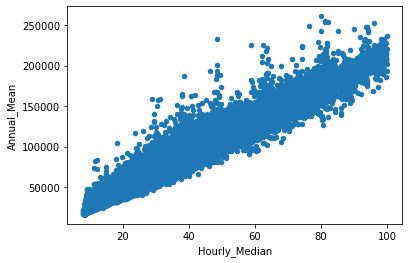

In [17]:
allData[['Hourly_Median', 'Annual_Mean']].plot(x='Hourly_Median', y='Annual_Mean', kind='scatter')

In [18]:
objData = allData[['State', 'Occupation']]
print(objData)

allData = allData.drop(columns=['State', 'Occupation'])
allData

          State                                         Occupation
0       Alabama                           Accountants and Auditors
1       Alabama                                          Actuaries
2       Alabama     Adhesive Bonding Machine Operators and Tenders
3       Alabama  Administrative Law Judges, Adjudicators, and H...
4       Alabama                   Administrative Services Managers
...         ...                                                ...
325154  Wyoming           Welders, Cutters, Solderers, and Brazers
325155  Wyoming                                   Wellhead Pumpers
325156  Wyoming  Woodworking Machine Setters, Operators, and Te...
325157  Wyoming                                Writers and Authors
325158  Wyoming                 Zoologists and Wildlife Biologists

[325159 rows x 2 columns]


,Total_Employees,Hourly_Mean,Annual_Mean,Hourly_Median,Annual_Median,Year,Average CPI
0,14090,31.71,65960,29.37,61080,2014,236.736167
1,60,43.18,89820,35.23,73270,2014,236.736167
2,430,17.35,36080,16.42,34150,2014,236.736167
3,110,58.23,121110,66.46,138240,2014,236.736167
4,780,48.65,101200,43.21,89870,2014,236.736167
...,...,...,...,...,...,...,...
325154,1760,30.42,63280,29.23,60800,2021,267.203000
325155,450,32.05,66660,29.97,62330,2021,267.203000
325156,40,19.43,40420,18.05,37550,2021,267.203000
325157,30,29.51,61370,29.07,60460,2021,267.203000


In [19]:
objData.head()

,State,Occupation
0,Alabama,Accountants and Auditors
1,Alabama,Actuaries
2,Alabama,Adhesive Bonding Machine Operators and Tenders
3,Alabama,"Administrative Law Judges, Adjudicators, and H..."
4,Alabama,Administrative Services Managers


In [20]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# #0 high risk / 1 low risk (alphabetical order) 
# df['loan_status'] = le.fit_transform(df['loan_status'])
# df.head()

# Using Median Data to Target Annual Mean

In [21]:
# Create our features
X = allData.drop(columns=['Annual_Mean', 'Hourly_Mean'])

# Create our target
y = allData['Annual_Mean']
y.head()

0     65960
1     89820
2     36080
3    121110
4    101200
Name: Annual_Mean, dtype: int64

In [22]:
y.tail()

325154    63280
325155    66660
325156    40420
325157    61370
325158    65570
Name: Annual_Mean, dtype: int64

In [23]:
# X = pd.get_dummies(X)
# X.head()

In [24]:
X.describe()

,Total_Employees,Hourly_Median,Annual_Median,Year,Average CPI
count,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000
mean,1.263446e+04,24.024297,49969.939322,2016.455396,245.252803
std,1.661605e+05,12.457604,25911.811243,2.876947,11.732125
min,3.000000e+01,7.850000,16330.000000,2012.000000,229.593917
25%,2.500000e+02,15.260000,31750.000000,2014.000000,236.736167
50%,8.600000e+02,20.770000,43200.000000,2016.000000,240.007167
75%,3.310000e+03,29.380000,61120.000000,2019.000000,255.657417
max,1.738240e+07,99.980000,207950.000000,2021.000000,267.203000


In [25]:
y

0          65960
1          89820
2          36080
3         121110
4         101200
           ...  
325154     63280
325155     66660
325156     40420
325157     61370
325158     65570
Name: Annual_Mean, Length: 325159, dtype: int64

In [26]:
# Check the balance of our target values
y.value_counts() #this equal to one can be outlier group // maybe drop

34240     109
37760     105
35780     102
35840     102
38990     101
         ... 
150130      1
213320      1
149980      1
159700      1
183110      1
Name: Annual_Mean, Length: 15483, dtype: int64

In [27]:
# outliers = []

# for count in y:
#     if y.value_counts()[1] == 1:
#         outliers.append(y)
# outliers
# y=pd.DataFrame(y)
# y['annual_mean']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train.shape
#Counter(y_train)
y_train

180819     40590
224538     31000
129624     19780
324457     38220
144917     48060
           ...  
119879     43690
259178    140600
131932     43650
146867     27430
121958     47740
Name: Annual_Mean, Length: 243869, dtype: int64

In [29]:
# Resample the training data with the BalancedRandomForestClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier

model = LinearRegression()
# Fitting the model
model = model.fit(X_train, y_train)

# Making predictions using the testing data.
y_pred = model.predict(X_test)

In [30]:
# # Calculated the balanced accuracy score
# balanced_accuracy_score(y_test, y_pred)

# y_pred = model.predict(X)
print(y_pred.shape)

(81290,)


In [31]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[ 2.10360860e-03  3.88926027e+03 -8.25942029e-01  8.69430175e+01
 -1.06136322e+01]
-171873.2861140502


In [32]:
model.score(X_test, y_test)

0.969728812778148

In [33]:
model.score(X_train, y_train)

0.969725607190536

In [34]:
y_pred

array([49680.17202594, 76145.51351285, 71175.66184445, ...,
       82187.48230073, 88401.76366942, 43518.50406442])

In [35]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

# Using Wage Data to Target Average Annual Cost Price Index (CPI)

In [52]:
# Create our features
X = allData.drop(columns=['Average CPI'])

# Create our target
y = allData['Average CPI']
y.head()

0    236.736167
1    236.736167
2    236.736167
3    236.736167
4    236.736167
Name: Average CPI, dtype: float64

In [53]:
# Check the balance of our target values
y.value_counts()

229.593917    33261
232.957083    33144
236.736167    33059
237.017000    32970
240.007167    32926
267.203000    32814
245.119583    32216
251.106833    32107
255.657417    31508
258.811167    31154
Name: Average CPI, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train.shape
#Counter(y_train)
y_train

180819    251.106833
224538    245.119583
129624    237.017000
324457    267.203000
144917    240.007167
             ...    
119879    237.017000
259178    255.657417
131932    237.017000
146867    240.007167
121958    237.017000
Name: Average CPI, Length: 243869, dtype: float64

In [55]:
# Resample the training data with the BalancedRandomForestClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier

model = LinearRegression()
# Fitting the model
model = model.fit(X_train, y_train)

# Making predictions using the testing data.
y_pred = model.predict(X_test)

In [56]:
print(y_pred.shape)

(81290,)


In [57]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[-1.04736929e-08  1.06202491e+01 -5.10802913e-03  8.15870209e+00
 -3.91939924e-03  4.00660346e+00]
-7833.930223710058


In [58]:
model.score(X_test, y_test)

0.9660293105766176

In [59]:
model.score(X_train, y_train)

0.9659734220067694

In [60]:
y_pred

array([263.50526621, 235.39309661, 263.41350497, ..., 243.45157227,
       247.41641865, 251.45223309])